# Fonction normale

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


plt.scatter(X,y,s=10)
plt.title('Jeu de données obtenu aléatoirement')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # ajouter x0 = 1 à chaque observation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.93290565]
 [3.10027901]]


## Prédictions

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # ajouter x0 = 1 à chaque obs.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.93290565],
       [10.13346367]])

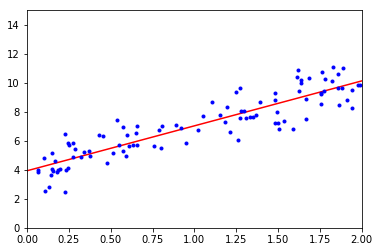

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## même mais pour sk-learn

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
values = lin_reg.intercept_, lin_reg.coef_
print(values)
lin_reg.predict(X_new)

(array([3.93290565]), array([[3.10027901]]))


array([[ 3.93290565],
       [10.13346367]])

# Descente de Gradient

## Descente ordinaire 

In [6]:
eta = 0.1  # taux d’apprentissage
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # initialisation aléatoire

for iteration in range(n_iterations):    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)    
    theta = theta - eta * gradients
    
print(theta)

[[3.93290565]
 [3.10027901]]


## Descente stochastique

In [7]:
n_epochs = 50
t0, t1 = 5, 50  # hyperparam. d’échéancier d’apprent.
def learning_schedule(t):    
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # init. aléatoire
for epoch in range(n_epochs):    
    for i in range(m):
        random_index = np.random.randint(m)        
        xi = X_b[random_index:random_index+1]        
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)       
        eta = learning_schedule(epoch * m + i)       
        theta = theta - eta * gradients

print(theta)

[[3.90786365]
 [3.05444614]]


### Descente stochastique in sk-learn

In [8]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.93563217] [3.10353253]


C:\ProgramData\Anaconda3\envs\env_ml_learn3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


# Regression lineaire

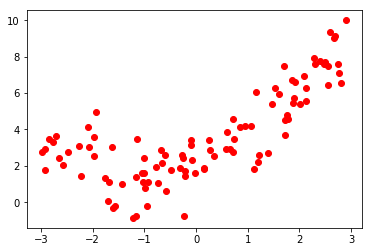

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'ro')
plt.show()


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.69279224]
[2.69279224 7.25113006]


In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.12658622] [[1.02328058 0.46892065]]


# courbe d'apprentissage

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)    
    train_errors, val_errors = [], []    
    for m in range(1, len(X_train)):        
        model.fit(X_train[:m], y_train[:m])        
        y_train_predict = model.predict(X_train[:m])        
        y_val_predict = model.predict(X_val)        
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))        
        val_errors.append(mean_squared_error(y_val_predict, y_val))    
        line_entrainement, = plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")    
        line_validation, = plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
        plt.legend(handles=[line_entrainement, line_validation])
        plt.xlabel('Taille du jeu d\'entraînement')
        plt.ylabel('RMSE')
        
        axes = plt.gca()
        #axes.set_xlim([xmin,xmax])
        axes.set_ylim([0,5])

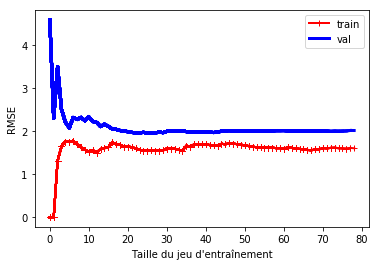

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

## courbe apprentissage modèle polynomiale

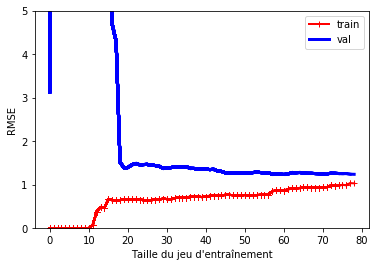

In [49]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((        
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),        
    ("lin_reg", LinearRegression()),    
))

plot_learning_curves(polynomial_regression, X, y)